# Task 1: Probability (25 points)
For this task, write a code in Python that generates all the different figures, as requested for each problem.


- A. (5 pts) Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $N(x; 1, 1)$.
Hint: you might want to look at the library scipy.stats and use the function norm.pdf().
- B. (5 pts) Calculate the probability mass that the random variable $X$ is less than $0$
- C. Consider the new observation variable z, it gives information about the variable x by the likelihood
function $p(z|x) = N (z; x, σ 2 )$, with variance $σ 2 = 0.2$. Apply the Bayes’ theorem to derive the posterior
distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior
distribution, $p(x)$, too.



## A. (5 pts) 
Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $N(x; 1, 1)$.

In [130]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

density function (PDF) of the normal distribution is:

$$
f(x)=\frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$

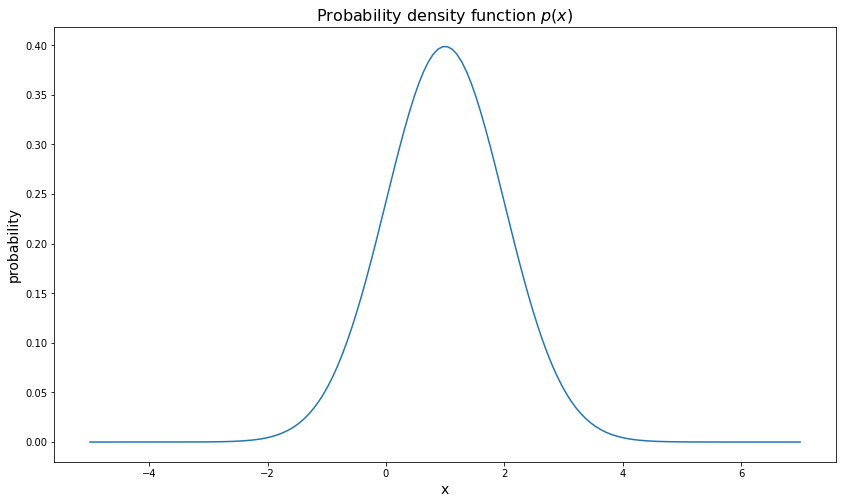

In [131]:
proba = norm(loc=1, scale=1)
x = np.linspace(-5, 7, 150)
p_x = proba.pdf(x)

plt.figure(figsize=(14,8))
plt.plot(x, p_x)
plt.title(r'Probability density function $p(x)$', size=16)
plt.xlabel('x', size=14)
plt.ylabel('probability', size=14)
plt.show()

## B. (5 pts) 
Calculate the probability mass that the random variable $X$ is less than $0$

$$
p(x \leq 0) = \int_{-\infty}^{0}p(x)dx
$$

The cumulative distribution function of a random variable $X$, evaluated at $0$, is the probability that $X$ will take a value less than or equal to $0$. Since the normal distribution is a continuous distribution, the shaded area of the curve represents the probability that $X$ is less or equal than $0$.

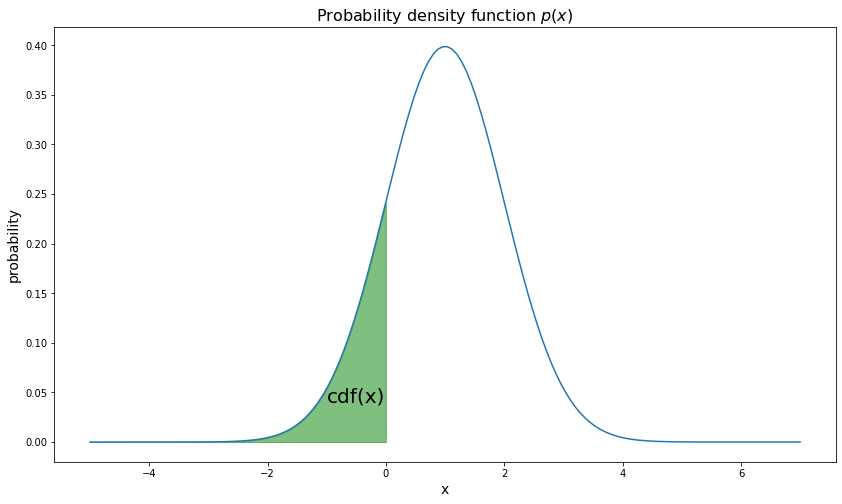

In [132]:
proba = norm(loc=1, scale=1)
x = np.linspace(-5, 7, 150)
p_x = proba.pdf(x)

plt.figure(figsize=(14,8))
plt.plot(x, p_x)

# for fill_between
px = np.linspace(-5, 0, 150)
plt.fill_between(px,proba.pdf(px),alpha=0.5, color='g')
plt.text(-1,0.04,"cdf(x)", fontsize=20)

plt.title(r'Probability density function $p(x)$', size=16)
plt.xlabel('x', size=14)
plt.ylabel('probability', size=14)
plt.show()

In [133]:
print(f'Probability mass that X is less than 0:\n{proba.cdf(0)}')

Probability mass that X is less than 0:
0.15865525393145707


## C. (15 pts)
Consider the new observation variable $z$, it gives information about the variable $x$ by the likelihood
function $p(z|x) = N (z; x, σ^2 )$, with variance $σ^2 = 0.2$. Apply the Bayes’ theorem to derive the posterior
distribution, $p(x|z)$, given an observation $z = 0.75$ and plot it. For a better comparison, plot the prior
distribution, $p(x)$, too.


Applying Bayes theorem we can easily calculate posterior distribution $p(x|z)$. Let's recall Bayes theorem:
$$
p(x|z) = \frac{p(z|x)p(x)}{p(z)}
$$
In our task *Prior* is $p(x) = N(x|1, 1)$


*Likelihood* is $p(z|x) = N(z|x, 0.2)$


*Evidence* or *normlization factor* is $p(z) = \int_{}{}p(z|x)p(x)dx$


In [134]:
z = 0.75
likelihood_var = 0.2

prior = norm(loc=1, scale=1)

### C. 1. Numerical integration
Let's first find normalization factor numericaly by integrating product of likelihood and prior w.r.t. $x$

In [135]:
import scipy.integrate



def numeric_posterior(x, z):
    likelihood_prior = lambda x: norm(loc=x, scale=np.sqrt(0.2)).pdf(z) * prior.pdf(x)
    normalization_const = scipy.integrate.quad(likelihood_prior, -4, 6)[0]

    return likelihood_prior(x) / normalization_const

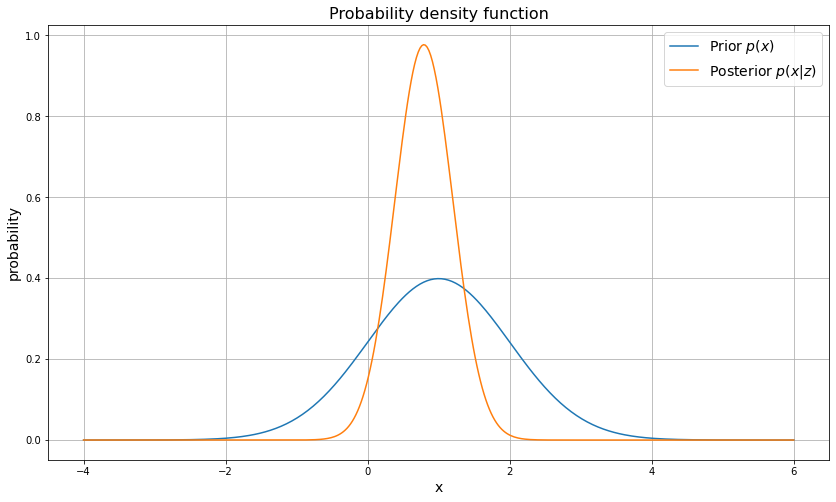

In [136]:
x = np.linspace(-4, 6, 400)
p_x = prior.pdf(x)
posterior = numeric_posterior(x, z)
plt.figure(figsize=(14,8))
plt.plot(x, p_x, label=r'Prior $p(x)$')
plt.plot(x, posterior, label=r'Posterior $p(x|z)$')
plt.title(r'Probability density function', size=16)
plt.xlabel('x', size=14)
plt.ylabel('probability', size=14)
plt.legend(prop={'size': 14})
plt.grid(True)
plt.show()

### C. 2. Conjugate distributions
Let us consider Bayesian estimation of the mean of a univariate Gaussian, whose variance is assumed to be known.


The likelihood is 
$$p\left(D \mid \mu, \sigma^{2}\right)=\prod_{i=1}^{n} p\left(x_{i} \mid \mu, \sigma^{2}\right)=\left(2 \pi \sigma^{2}\right)^{-n / 2} \exp \left\{-\frac{1}{2 \sigma^{2}} \sum_{i=1}^{n}\left(x_{i}-\mu\right)^{2}\right\}$$

Empirical mean and variance
$$
\begin{aligned}
\bar{x} &=\frac{1}{n} \sum_{i=1}^{n} x_{i} \\
s^{2} &=\frac{1}{n} \sum_{i=1}^{n}\left(x_{i}-\bar{x}\right)^{2}
\end{aligned}
$$

Let's rewrite it in the exponent:

$$
\begin{aligned}
\sum_{i}\left(x_{i}-\mu\right)^{2} &=\sum_{i}\left[\left(x_{i}-\bar{x}\right)-(\mu-\bar{x})\right]^{2} \\
&=\sum_{i}\left(x_{i}-\bar{x}\right)^{2}+\sum_{i}(\bar{x}-\mu)^{2}-2 \sum_{i}\left(x_{i}-\bar{x}\right)(\mu-\bar{x}) \\
&=n s^{2}+n(\bar{x}-\mu)^{2}
\end{aligned}
$$

Since

$$
\begin{aligned}
\sum_{i}\left(x_{i}-\bar{x}\right)(\mu-\bar{x}) &=(\mu-\bar{x})\left(\left(\sum_{i} x_{i}\right)-n \bar{x}\right)=(\mu-\bar{x})(n \bar{x}-n \bar{x})=0
\end{aligned}
$$

Hence

$$
\begin{aligned}
p\left(D \mid \mu, \sigma^{2}\right) &=\frac{1}{(2 \pi)^{n / 2}} \frac{1}{\sigma^{n}} \exp \left(-\frac{1}{2 \sigma^{2}}\left[n s^{2}+n(\bar{x}-\mu)^{2}\right]\right) \\
& \propto\left(\frac{1}{\sigma^{2}}\right)^{n / 2} \exp \left(-\frac{n}{2 \sigma^{2}}(\bar{x}-\mu)^{2}\right) \exp \left(-\frac{n s^{2}}{2 \sigma^{2}}\right)
\end{aligned}
$$

Since variance is a constant, we derive

$$
p(D \mid \mu) \propto \exp \left(-\frac{n}{2 \sigma^{2}}(\bar{x}-\mu)^{2}\right) \propto \mathcal{N}\left(\bar{x} \mid \mu, \frac{\sigma^{2}}{n}\right)
$$

And this leads to the **conjugate prior** that has the form

$$
p(\mu) \propto \exp \left(-\frac{n}{2 \sigma_0^{2}}(\bar{x}-\mu_0)^{2}\right) \propto \mathcal{N}\left(\bar{x} \mid \mu_0, \sigma_0^{2}\right)
$$

Where $\mu_0$ and $\sigma_0^{2}$ mean and variance of the prior.


Hence the posterior is given by

$$
\begin{aligned}
p(\mu \mid D) & \propto p(D \mid \mu, \sigma) p\left(\mu \mid \mu_{0}, \sigma_{0}^{2}\right) \\
& \propto \exp \left[-\frac{1}{2 \sigma^{2}} \sum_{i}\left(x_{i}-\mu\right)^{2}\right] \times \exp \left[-\frac{1}{2 \sigma_{0}^{2}}\left(\mu-\mu_{0}\right)^{2}\right] \\
&=\exp \left[\frac{-1}{2 \sigma^{2}} \sum_{i}\left(x_{i}^{2}+\mu^{2}-2 x_{i} \mu\right)+\frac{-1}{2 \sigma_{0}^{2}}\left(\mu^{2}+\mu_{0}^{2}-2 \mu_{0} \mu\right)\right]
\end{aligned}
$$

Since the product of two Gaussians is a Gaussian, we have

$$
\begin{aligned}
p(\mu \mid D) & \propto \exp \left[-\frac{\mu^{2}}{2}\left(\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}\right)+\mu\left(\frac{\mu_{0}}{\sigma_{0}^{2}}+\frac{\sum_{i} x_{i}}{\sigma^{2}}\right)-\left(\frac{\mu_{0}^{2}}{2 \sigma_{0}^{2}}+\frac{\sum_{i} x_{i}^{2}}{2 \sigma^{2}}\right)\right] \\
& \stackrel{\text { def }}{=} \exp \left[-\frac{1}{2 \sigma_{n}^{2}}\left(\mu^{2}-2 \mu \mu_{n}+\mu_{n}^{2}\right)\right]=\exp \left[-\frac{1}{2 \sigma_{n}^{2}}\left(\mu-\mu_{n}\right)^{2}\right]
\end{aligned}
$$

Hence after some calculations

$$
\begin{aligned}
\frac{-\mu^{2}}{2 \sigma_{n}^{2}} &=\frac{-\mu^{2}}{2}\left(\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}\right) \\
\frac{1}{\sigma_{n}^{2}} &=\frac{1}{\sigma_{0}^{2}}+\frac{n}{\sigma^{2}}
\end{aligned}
$$

we find $\sigma_{n}^{2}$

$$
\begin{aligned}
\sigma_{n}^{2} &=\frac{\sigma^{2} \sigma_{0}^{2}}{n \sigma_{0}^{2}+\sigma^{2}}=\frac{1}{\frac{n}{\sigma^{2}}+\frac{1}{\sigma_{0}^{2}}}
\end{aligned}
$$

And $\mu_{n}$

$$
\begin{gathered}
\frac{-2 \mu \mu_{n}}{-2 \sigma_{n}^{2}}=\mu\left(\frac{\sum_{i=1}^{n} x_{i}}{\sigma^{2}}+\frac{\mu_{0}}{\sigma_{0}^{2}}\right) \\
\frac{\mu_{n}}{\sigma_{n}^{2}}=\frac{\sum_{i=1}^{n} x_{i}}{\sigma^{2}}+\frac{\mu_{0}}{\sigma_{0}^{2}} \\
=\frac{\sigma_{0}^{2} n \bar{x}+\sigma^{2} \mu_{0}}{\sigma^{2} \sigma_{0}^{2}} \\
\mu_{n}=\frac{\sigma^{2}}{n \sigma_{0}^{2}+\sigma^{2}} \mu_{0}+\frac{n \sigma_{0}^{2}}{n \sigma_{0}^{2}+\sigma^{2}} \bar{x}=\sigma_{n}^{2}\left(\frac{\mu_{0}}{\sigma_{0}^{2}}+\frac{n \bar{x}}{\sigma^{2}}\right)
\end{gathered}
$$

In [137]:
def conj_posterior(x, z):
    var = 1 / (1 / prior.std() + len(z) / 0.2)
    loc = var * (prior.mean() / prior.std() + np.sum(z) / 0.2)
    return norm(loc=loc, scale=np.sqrt(var))

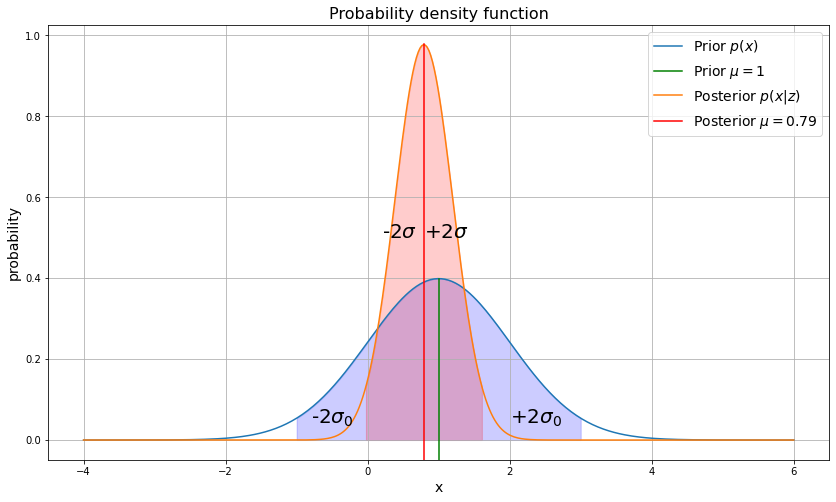

In [138]:
x = np.linspace(-4, 6, 400)
p_x = prior.pdf(x)
posterior = conj_posterior(x, [z])
plt.figure(figsize=(14,8))

plt.plot(x, p_x, label=r'Prior $p(x)$')
plt.axvline(
    x=prior.mean(), 
    ymin=prior.pdf(x).min(), 
    ymax=(prior.pdf(x).max() + 0.017), 
    color='g', label=r'Prior $\mu =1$'
    )
# for fill_between
prior_conf_interval = np.linspace(
    prior.mean() - 2*prior.std(),
    prior.mean() + 2*prior.std(),
    150
    )
plt.fill_between(prior_conf_interval,prior.pdf(prior_conf_interval),alpha=0.2, color='b')
plt.text(-0.8,0.04,r"-2$\sigma_0$", fontsize=20)
plt.text(2,0.04,r"+2$\sigma_0$", fontsize=20)

plt.plot(x, posterior.pdf(x), label=r'Posterior $p(x|z)$')
plt.axvline(
    x=posterior.mean(), 
    ymin=posterior.pdf(x).min(), 
    ymax=(posterior.pdf(x).max() - 0.02), 
    color='r', label=r'Posterior $\mu =0.79$'
    )
# for fill_between
posterior_conf_interval = np.linspace(
    posterior.mean() - 2*posterior.std(),
    posterior.mean() + 2*posterior.std(),
    150
    )
plt.fill_between(posterior_conf_interval,posterior.pdf(posterior_conf_interval),alpha=0.2, color='r')
plt.text(0.2,0.5,r"-2$\sigma$", fontsize=20)
plt.text(0.8,0.5,r"+2$\sigma$", fontsize=20)

plt.title(r'Probability density function', size=16)
plt.xlabel('x', size=14)
plt.ylabel('probability', size=14)
plt.legend(prop={'size': 14})
plt.grid(True)
plt.show()

## Summary
The idea of the Bayesian method is to compute the posterior for every data point. After having our prior knowledge, and updating it with the likelihood for only one data point, what we have is the prior knowledge of any other new data points. And even one update of prior knowledge gives us new information about data distribution. Like in our example:
- after updating prior distribution by calculation the posterior we update our confidence interval. Posterior's $\sigma$ is less than prior's $\sigma$, hence Posterior's pdf is more narrow and the width of its confidence (credible) interval is less then prior's. Posterior's $\mu$ is apdated as well. We can say that after observing $z=0.75$ 95% of samples of $x$ r.v. are more likely concentrated between $+-0.82$, while in prior distribution the interval was wider.
